In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline
%load_ext autoreload
%autoreload 2


In [2]:
from utils import load_cifar10_data
x_train, y_train, x_validate, y_validate, x_test, y_test = load_cifar10_data()

Data has apparently already been downloaded and unpacked.
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_1
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_2
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_3
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_4
Loading data: data/CIFAR-10/cifar-10-batches-py/data_batch_5
Loading data: data/CIFAR-10/cifar-10-batches-py/test_batch


In [3]:
import network, train, utils
from layers import ReluLayer, BinaryFullyConnectedLayer, \
    BinaryConvolutionLayer, BatchNormLayer, MaxPoolingLayer

/home/astar/binary2/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility
  return f(*args, **kwds)


In [4]:
nn = network.NeuralNetwork(in_size=[None, 32, 32, 3], n_out_classes=10, 
                           loss_func=utils.smooth_hinge_loss)
nn.reset_graph()

# Hidden Conv-1
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-2
nn.add_layer(BinaryConvolutionLayer(
    out_dim=128, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-3
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-4
nn.add_layer(BinaryConvolutionLayer(
    out_dim=256, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-5
nn.add_layer(BinaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Conv-6
nn.add_layer(BinaryConvolutionLayer(
    out_dim=512, filter_size=3))
nn.add_layer(MaxPoolingLayer())
nn.add_layer(BatchNormLayer(axes=[0, 1, 2]))
nn.add_layer(ReluLayer())

# Hidden Fc-7
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-8
nn.add_layer(BinaryFullyConnectedLayer(
    out_dim=1024))
nn.add_layer(BatchNormLayer(axes=[0]))
nn.add_layer(ReluLayer())

# Hidden Fc-9
nn.add_layer(BinaryFullyConnectedLayer(out_dim=10))
nn.add_layer(BatchNormLayer(axes=[0]))

nn.finalize()

In [5]:
data_train = (x_train, y_train)
opt = train.Trainer(nn, data_train)

In [6]:
# Hyper-parameters
opt.set_rho(0.5)
opt.set_ema_rates(0.999)

In [7]:
losses_and_accs_train = []
losses_and_accs_valid = []
losses_and_accs_test = []

n_epochs = 500

for t in range(n_epochs):        
    print('Epoch: ', t)

    opt.train_epoch(batch_size=100, ema_decay=0.98, n_output=10, verbose=True)
    losses_and_accs_train.append(
        opt.loss_and_accuracy((x_train, y_train), max_batch=400, inference=True))
    losses_and_accs_test.append(
        opt.loss_and_accuracy((x_test, y_test), max_batch=400, inference=True))
    losses_and_accs_valid.append(
        opt.loss_and_accuracy((x_validate, y_validate), max_batch=400, inference=True))
    
    print('Train loss/acc: ', losses_and_accs_train[-1],
          'Test loss/acc: ', losses_and_accs_test[-1])
    
losses_and_accs_train = np.asarray(losses_and_accs_train)
losses_and_accs_valid = np.asarray(losses_and_accs_valid)
losses_and_accs_test = np.asarray(losses_and_accs_test)

Epoch:  0
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999, 0.999]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 2.627206, 0.42
Iter: 45 of 450 || Estimated train loss/acc: 2.423992, 0.31
Iter: 90 of 450 || Estimated train loss/acc: 2.251406, 0.39
Iter: 135 of 450 || Estimated train loss/acc: 2.155034, 0.30
Iter: 180 of 450 || Estimated train loss/acc: 1.973269, 0.40
Iter: 225 of 450 || Estimated train loss/acc: 1.824133, 0.34
Iter: 270 of 450 || Estimated train loss/acc: 1.724646, 0.41
Iter: 315 of 450 || Estimated train loss/acc: 1.764586, 0.33
Iter: 360 of 450 || Estimated train loss/acc: 1.607847, 0.32
Iter: 405 of 450 || Estimated train loss/acc: 1.382671, 0.44
Train loss/acc:  (1.4507601907518175, 0.3601111110051473) Test loss/acc:  (1.460156831741333, 0.3535000026226044)
Epoch:  1
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.99902004, 0.99902004, 

Iter: 315 of 450 || Estimated train loss/acc: 0.059356, 0.91
Iter: 360 of 450 || Estimated train loss/acc: 0.063340, 0.92
Iter: 405 of 450 || Estimated train loss/acc: 0.089027, 0.89
Train loss/acc:  (0.11824405034383138, 0.8073111118210686) Test loss/acc:  (0.15977851510047913, 0.733800003528595)
Epoch:  9
========= Begin epoch =========
batch_size = 100
EMA rates:
[0.9991662, 0.9991662, 0.9991662, 0.9991662, 0.9991662, 0.9991662, 0.9991662, 0.9991662, 0.9991662]
rho:
[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Iter: 0 of 450 || Estimated train loss/acc: 0.057180, 0.90
Iter: 45 of 450 || Estimated train loss/acc: 0.040245, 0.97
Iter: 90 of 450 || Estimated train loss/acc: 0.059326, 0.92
Iter: 135 of 450 || Estimated train loss/acc: 0.060088, 0.94
Iter: 180 of 450 || Estimated train loss/acc: 0.024633, 0.98
Iter: 225 of 450 || Estimated train loss/acc: 0.073244, 0.86
Iter: 270 of 450 || Estimated train loss/acc: 0.092752, 0.87
Iter: 315 of 450 || Estimated train loss/acc: 0.047597, 0

In [8]:
print('Train: ', opt.loss_and_accuracy((x_train, y_train), inference=True,
                                       max_batch=400))
print('Valid: ', opt.loss_and_accuracy((x_validate, y_validate), inference=True,
                                      max_batch=400))
print('Test: ', opt.loss_and_accuracy((x_test, y_test), inference=True,
                                     max_batch=400))

Train:  (0.1025905293226242, 0.836111110051473)
Valid:  (0.14078369140625, 0.7754000020027161)
Test:  (0.14725247889757156, 0.7607999992370605)


In [9]:
best_epoch = np.argmax(losses_and_accs_valid[:,1]) + 1
print('Best epoch: ', best_epoch)
print('Train acc: ', losses_and_accs_train[best_epoch-1, 1])
print('Valid acc: ', losses_and_accs_valid[best_epoch-1, 1])
print('Test acc: ', losses_and_accs_test[best_epoch-1, 1])

Best epoch:  10
Train acc:  0.836111110051473
Valid acc:  0.7754000020027161
Test acc:  0.7607999992370605


Final results:  [0.10259053 0.83611111 0.14078369 0.7754     0.14725248 0.7608    ]


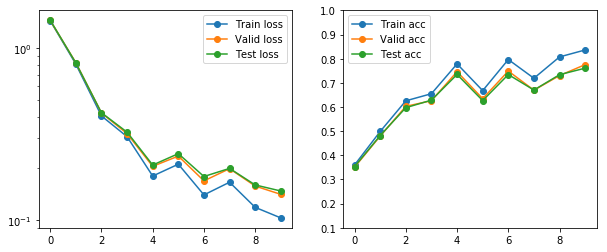

In [10]:
# Save data
losses_and_accs = np.concatenate(
    [np.asarray(losses_and_accs_train),
     np.asarray(losses_and_accs_valid),
     np.asarray(losses_and_accs_test)], axis=1)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.semilogy(losses_and_accs[:,0], '-o', label='Train loss')
ax1.semilogy(losses_and_accs[:,2], '-o', label='Valid loss')
ax1.semilogy(losses_and_accs[:,4], '-o', label='Test loss')

ax2.plot(losses_and_accs[:,1], '-o', label='Train acc')
ax2.plot(losses_and_accs[:,3], '-o', label='Valid acc')
ax2.plot(losses_and_accs[:,5], '-o', label='Test acc')

for ax in [ax1,ax2]:
    ax.legend()

ax2.set_ylim(0.1,1)
    
print('Final results: ', losses_and_accs[-1])